In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Vamsh\Downloads\iris_modified.csv")

In [3]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


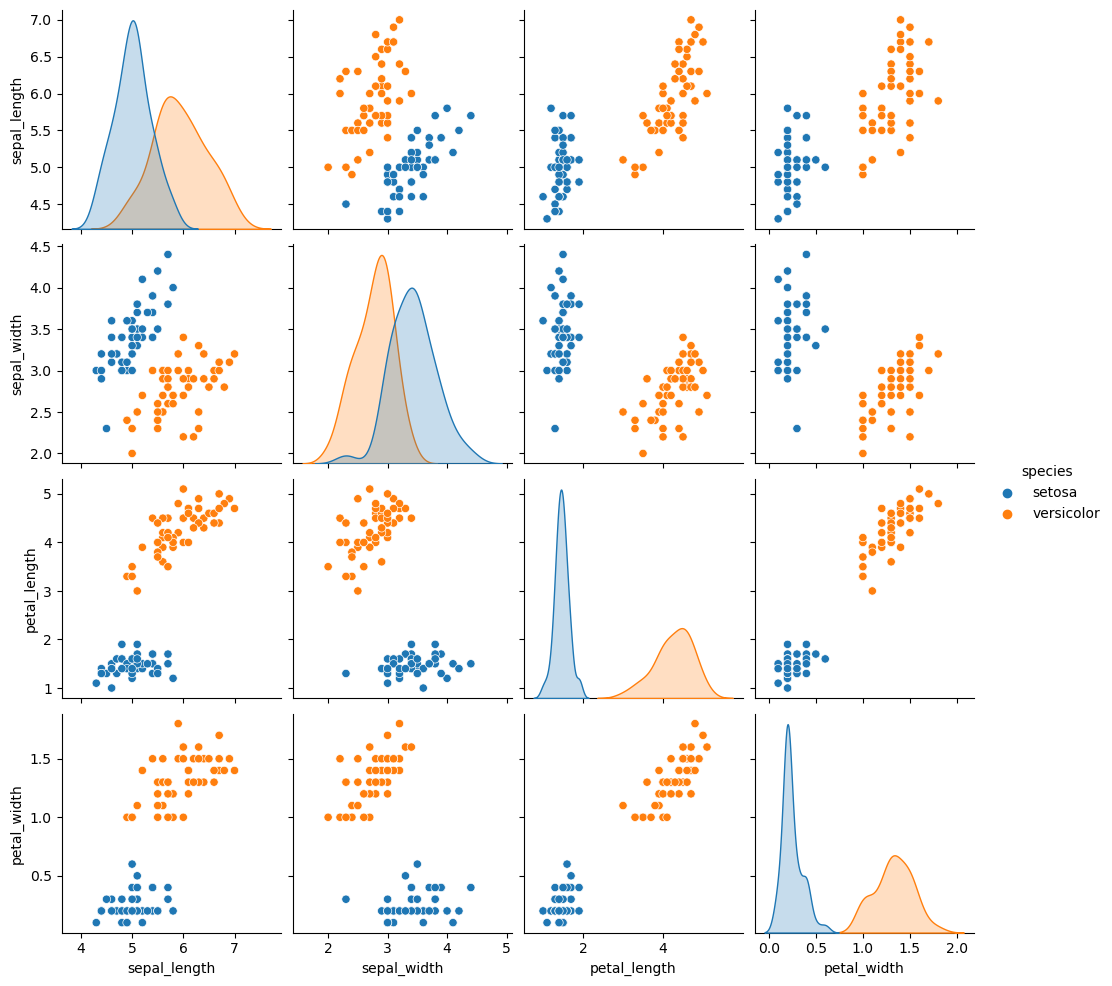

In [6]:
sns.pairplot(df,hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

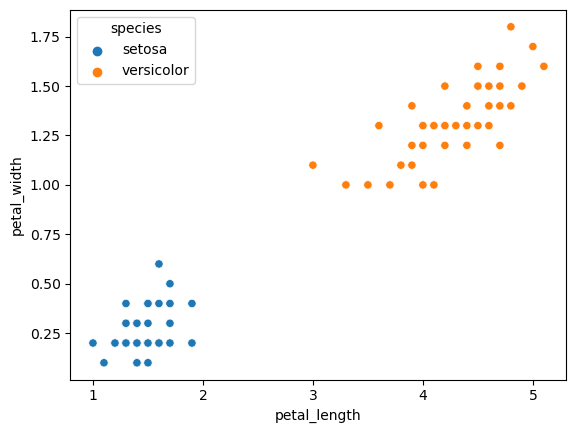

In [7]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

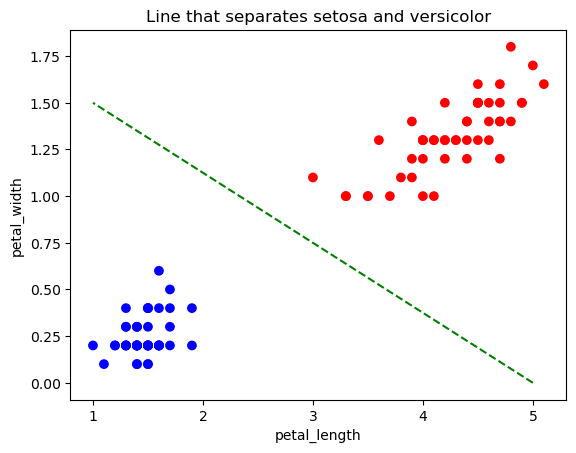

In [8]:
# select only the data points for the first two classes
class_1 = df.loc[df['species'].isin(['setosa', 'versicolor'])]

# setosa will be represented by blue and versicolor by red
colors = {'setosa':'blue', 'versicolor':'red'}

# plot the data points using a scatter plot
plt.scatter(class_1['petal_length'], class_1['petal_width'], c=class_1['species'].apply(lambda x: colors[x]))

# plot the line that best separates the two classes
plt.plot([5,1], [0,1.5], linestyle='--', color='green')

# set the labels for the x and y axes
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# set the title of the plot
plt.title('Line that separates setosa and versicolor')

# show the plot
plt.show()


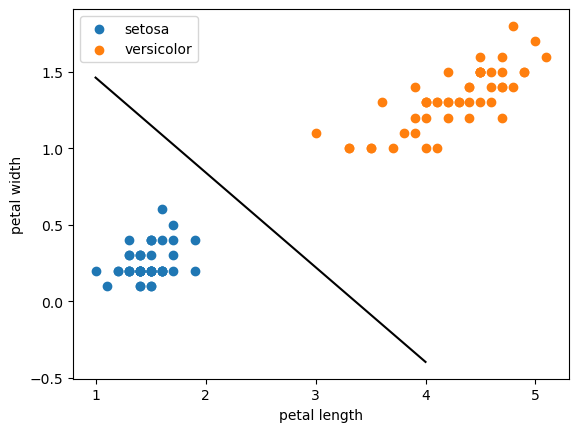

Weights: petal_length   -0.083605
petal_width    -0.179879
Name: 0, dtype: object
Bias: [0.26300245]


In [14]:
import numpy as np

# define the perceptron function
def perceptron(x, w, b):               # x = input values , w = weight , b = bias
    y = np.dot(x, w) + b              # y = out put value
    return 1 if y > 0 else 0           

# define the update function
def update(x, w, b, y, eta):
    error = y - perceptron(x, w, b)
    w += eta * error * x
    b += eta * error
    return w, b

# initialize the weights and bias
w = np.random.rand(2)
b = np.random.rand(1)

# set the learning rate
eta = 0.1

# train the perceptron
for i in range(120):
    for j in range(len(df)):
        x = df.iloc[j][['petal_length', 'petal_width']]
        if df.iloc[j]['species'] == 'setosa':
            y = 1
        else:
            y = 0
        w, b = update(x, w, b, y, eta)
        
# separate the data by species
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']       

# plot the data points as a scatter plot
plt.scatter(setosa['petal_length'], setosa['petal_width'], label='setosa')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], label='versicolor')

# draw the separator line
x = [1, 4]
y = [-b/w[1], (-b-w[0]*4)/w[1]]
plt.plot(x, y, color='black')

# add axis labels and legend
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

# show the plot
plt.show()

print("Weights:",w)
print("Bias:",b)